In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bart-fine-tuned/mbart_tokenizer.json/spiece.model
/kaggle/input/bart-fine-tuned/mbart_tokenizer.json/tokenizer.json
/kaggle/input/bart-fine-tuned/mbart_tokenizer.json/tokenizer_config.json
/kaggle/input/bart-fine-tuned/mbart_tokenizer.json/special_tokens_map.json
/kaggle/input/bart-fine-tuned/mbart_tokenizer.json/added_tokens.json
/kaggle/input/bart-fine-tuned/mbart_model.pt/config.json
/kaggle/input/bart-fine-tuned/mbart_model.pt/model.safetensors
/kaggle/input/bart-fine-tuned/mbart_model.pt/generation_config.json
/kaggle/input/test-data-cleaned-hindi/test_data.csv
/kaggle/input/bart-tuned/mbart_tokenizer.json/spiece.model
/kaggle/input/bart-tuned/mbart_tokenizer.json/tokenizer.json
/kaggle/input/bart-tuned/mbart_tokenizer.json/tokenizer_config.json
/kaggle/input/bart-tuned/mbart_tokenizer.json/special_tokens_map.json
/kaggle/input/bart-tuned/mbart_tokenizer.json/added_tokens.json
/kaggle/input/bart-tuned/mbart_model.pt/config.json
/kaggle/input/bart-tuned/mbart_model.pt

In [10]:
data = pd.read_csv("/kaggle/input/test-data-cleaned-hindi/test_data.csv")

In [3]:
data = data.reset_index(drop=True)
data.drop(data.columns[0], axis=1, inplace=True)

In [4]:
data.head(20)

,headline,article,Text_Cleaned,Summary_Cleaned
0,मिशेल के जन्मदिन पर ओबामा ने दी शानदार दावत,अमेरिका की प्रथम महिला मिशेल ओबामा के जन्मदिन ...,अमेरिका की प्रथम महिला मिशेल ओबामा के जन्मदिन ...,मिशेल के जन्मदिन पर ओबामा ने दी शानदार दावत
1,पतंजलि नमक का उड़ाया मजाक तो ट्रोल हो गए जावेद...,योग गुरु बाबा रामदेव की कंपनी पतंजलि आयुर्वेद ...,योग गुरु बाबा रामदेव की कंपनी पतंजलि आयुर्वेद ...,पतंजलि नमक का उड़ाया मजाक तो ट्रोल हो गए जावेद...
2,"शिवराज के साले को चुनाव लड़ना पड़ा भारी, मिले सि...",मध्य प्रदेश में विधानसभा चुनाव के लिए 28 नवंबर...,मध्य प्रदेश में विधानसभा चुनाव के लिए 28 नवंबर...,शिवराज के साले को चुनाव लड़ना पड़ा भारी मिले सिर...
3,रानी मुखर्जी को बेटी कहना काफी मुश्किल था: शाह...,बॉलीवुड के सुपरस्टार शाहरुख खान की फिल्म 'फैन'...,बॉलीवुड के सुपरस्टार शाहरुख खान की फिल्म फैन इ...,रानी मुखर्जी को बेटी कहना काफी मुश्किल था शाहर...
4,"उत्तराखंड में जारी रहेगा राष्ट्रपति शासन, केंद...",उत्तराखंड में राष्ट्रपति शासन हटाने के नैनीताल...,उत्तराखंड में राष्ट्रपति शासन हटाने के नैनीताल...,उत्तराखंड में जारी रहेगा राष्ट्रपति शासन केंद्...
5,"कैसे पूरा होगा मोदी का 'भारत जोड़ो' सपना, कर्न...",स्वतंत्रता दिवस पर लाल किले की प्राचीर से प्रध...,स्वतंत्रता दिवस पर लाल किले की प्राचीर से प्रध...,कैसे पूरा होगा मोदी का भारत जोड़ो सपना कर्नाटक...
6,"मन्नत में चुपके से पहुंचीं अनुष्का, क्या डर ग...",बॉलीवुड एक्ट्रेस अनुष्का शर्मा की फिल्म 24 मार...,बॉलीवुड एक्ट्रेस अनुष्का शर्मा की फिल्म 24 मार...,मन्नत में चुपके से पहुंचीं अनुष्का क्या डर गए ...
7,"शौहर के जुल्म से परेशान थी बीवी, मीडिया के साम...",देश में एक साथ तीन तलाक के बारे में सुप्रीम को...,देश में एक साथ तीन तलाक के बारे में सुप्रीम को...,शौहर के जुल्म से परेशान थी बीवी मीडिया के सामन...
8,गडकरी पर संघ का वरदहस्त,छह नवंबर को 11 बजे सुबह संघ विचारक एस. गुरुमूर...,छह नवंबर को 11 बजे सुबह संघ विचारक एस गुरुमूर्...,गडकरी पर संघ का वरदहस्त
9,नाहरगढ़ किले में फिर लिखे मिले चेतन सैनी के ना...,जयपुर के नाहरगढ़ किले में मंगलवार को फिर से पत...,जयपुर के नाहरगढ़ किले में मंगलवार को फिर से पत...,नाहरगढ़ किले में फिर लिखे मिले चेतन सैनी के ना...


In [2]:
import torch
from transformers import MBartForConditionalGeneration,MBartTokenizer, AutoTokenizer ,DataCollatorForSeq2Seq, Trainer, TrainingArguments, AutoModelForSeq2SeqLM
from torch.utils.data import Dataset, DataLoader

2024-05-06 07:51:31.669697: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 07:51:31.669793: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 07:51:31.828448: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
class Seq2SeqDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=500):
        self.input_text = data['Text_Cleaned'].tolist()
        self.labels = data['Summary_Cleaned'].tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.input_text)

    def __getitem__(self, idx):
        input_text = self.input_text[idx]
        label_text = self.labels[idx]

        # Tokenize the input text
        input_encodings = self.tokenizer(
            input_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        # Tokenize the label text to get its 'input_ids' and 'attention_mask'
        label_encodings = self.tokenizer(
            label_text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': input_encodings['input_ids'].squeeze(),
            'attention_mask': input_encodings['attention_mask'].squeeze(),
            'labels': label_encodings['input_ids'].squeeze(),
        }


In [3]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [4]:
# Load the saved model
model = AutoModelForSeq2SeqLM.from_pretrained("/kaggle/input/bart-fine-tuned/mbart_model.pt")
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("/kaggle/input/bart-fine-tuned/mbart_tokenizer.json")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
test_dataset = Seq2SeqDataset(data, tokenizer)

In [ ]:
test_dataloader = DataLoader(test_dataset, batch_size=16)

In [5]:
# Move the model to the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
!pip install datasets

In [6]:
# Move the model to the device (CPU or GPU)
model.to(device)

MBartForConditionalGeneration(
  (model): MBartModel(
    (shared): Embedding(64014, 1024, padding_idx=0)
    (encoder): MBartEncoder(
      (embed_tokens): Embedding(64014, 1024, padding_idx=0)
      (embed_positions): MBartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-5): 6 x MBartEncoderLayer(
          (self_attn): MBartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): La

In [7]:
import torch

In [ ]:
# Define the move_to_device function
def move_to_device(batch, device):
    if isinstance(batch, torch.Tensor):
        return batch.to(device)
    elif isinstance(batch, list):
        return [move_to_device(item, device) for item in batch]
    elif isinstance(batch, dict):
        return {key: move_to_device(value, device) for key, value in batch.items()}
    else:
        return batch  # If it's not a tensor, list, or dict, leave it as is

In [ ]:
# Initialize lists to store generated summarisaions and references
generated_summarisaions = []
references = []

# Generate summarisaions for the test dataset
for batch in test_dataloader:
    # Move the batch to CUDA
    batch = move_to_device(batch, 'cuda')

    input_text = batch['input_ids']  # Access the input_text using the correct key
    labels = batch['labels']  # Access the labels using the correct key

    # Generate summarisaions
    summarisaion_ids = model.generate(input_text, max_length=512, num_beams=4, length_penalty=2.0, early_stopping=True)

    # Move the summarisaion_ids to CPU to decode
    summarisaion_ids = summarisaion_ids.to('cpu')

    generated_summarisaion = tokenizer.batch_decode(summarisaion_ids, skip_special_tokens=True)

    generated_summarisaions.extend(generated_summarisaion)
    references.extend(tokenizer.batch_decode(labels, skip_special_tokens=True))  # Decoding the label IDs

# Make sure to move generated_summarisaions back to CPU for evaluation if necessary
generated_summarisaions = [summarisaion if not isinstance(summarisaion, str) else summarisaion for summarisaion in generated_summarisaions]


In [ ]:
Summaries = pd.DataFrame(list(zip(references, generated_summarisaions)), columns =['Summary', 'BARTSummary'])

In [3]:
#Summaries.to_csv("newBARTsummary.csv")
Summaries = pd.read_csv("/kaggle/input/newbartsumm/newBARTsummary.csv")
Summaries.drop(Summaries.columns[0], axis=1, inplace=True)
Summaries.head(10)

,Summary,BARTSummary
0,मिशेल के जन्मदिन पर ओबामा ने दी शानदार दावत,मिशेल ओबामा के जन्मदिन पर ओबामा ने की शानदार दावत
1,पतंजलि नमक का उड़ाया मजाक तो ट्रोल हो गए जावेद...,रामदेव की कंपनी पर चुटकुले के बाद जावेद जाफरी ...
2,शिवराज के साले को चुनाव लड़ना पड़ा भारी मिले स...,मध्य प्रदेश चुनाव वारासिवनी सीट पर काउंटिंग जारी
3,रानी मुखर्जी को बेटी कहना काफी मुश्किल था शाहर...,मेरे लिए फैन का मतलब है किसी को बेइंतेहा प्यार...
4,उत्तराखंड में जारी रहेगा राष्ट्रपति शासन केंद्...,उत्तराखंड में राष्ट्रपति शासन पर सुप्रीम कोर्ट...
5,कैसे पूरा होगा मोदी का भारत जोड़ो सपना कर्नाटक...,कर्नाटक के हालात पीएम मोदी के मंसूबों पर सवालि...
6,मन्नत में चुपके से पहुंचीं अनुष्का क्या डर गए ...,शाहरुख के घर फिल्लौरी बनकर पहुंचीं अनुष्का शर्...
7,शौहर के जुल्म से परेशान थी बीवी मीडिया के सामन...,तलाक के बाद शौहर से अलग रहने का ऐलान
8,गडकरी पर संघ का वरदहस्त,आडवाणी से मिले संघ विचारक गुरुमूर्ति
9,नाहरगढ़ किले में फिर लिखे मिले चेतन सैनी के ना...,चेतन सैनी की मौत की गुत्थी सुलझाने के लिए फिर ...


In [15]:
data['Text_Cleaned'][0]

'अमेरिका की प्रथम महिला मिशेल ओबामा के जन्मदिन पर उनके पति राष्ट्रपति बराक ओबामा ने व्हाइट हाउस के करीब ही एक भोजनालय में शानदार दावत का आयोजन किया मिशेल ओबामा 48 वर्ष की हो गयी हैं अमेरिका के प्रथम दंपति अपने करीबी दोस्तों के साथ कड़ी सुरक्षा के बीच राष्ट्रपति भवन के करीब स्थित भोजनालय बीएलटी स्टीक में जमा हुए पहले भी विभिन्न भोजनालयों में यह जोड़ा जन्मदिन का जश्न मना चुका है बर्थडे गर्ल मिशेल के साथ ओबामा उनकी उम्र को लेकर लगातार हंसी-मजाक करते रहे हैं राष्ट्रपति ने चुटकी ली जब हमारी शादी हुयी तभी इस पर थोड़ा विवाद सा था क्योंकि वह मुझसे 20 वर्ष छोटी थीं लेकिन अब लगता है ठीक-ठाक है फ्रांसीसी शेफ और उद्यमी लौरेंट टूरोंडल द्वारा स्थापित यह रेस्टोरेंट बीएलटी प्रथम महिला को काफी भाता है क्योंकि वह पहले भी यहां आ चुकी हैं यह नहीं बताया गया कि इस युगल ने क्या-क्या आर्डर दिया पिछले सप्ताह उन्होंने अपना ट्विटर अकाउंट खोला था और सोमवार की शाम को नृत्य कौशल का भी प्रदर्शन किया था '

In [16]:
Summaries['Summary'][0]

'मिशेल के जन्मदिन पर ओबामा ने दी शानदार दावत'

In [17]:
Summaries['BARTSummary'][0]

'मिशेल ओबामा के जन्मदिन पर ओबामा ने की शानदार दावत'

### **Plotting Rouge Score**

In [10]:
!pip3 install rouge

In [11]:
from rouge import Rouge

In [12]:
rouge = Rouge()
score = rouge.get_scores(str(Summaries['BARTSummary']), str(Summaries['Summary']), avg=True)
BARTRouge = pd.DataFrame(score).set_index([['recall','precision','f-measure']])
BARTRouge

,rouge-1,rouge-2,rouge-l
recall,0.526316,0.247619,0.515789
precision,0.574713,0.254902,0.563218
f-measure,0.549451,0.251208,0.538462


In [13]:
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



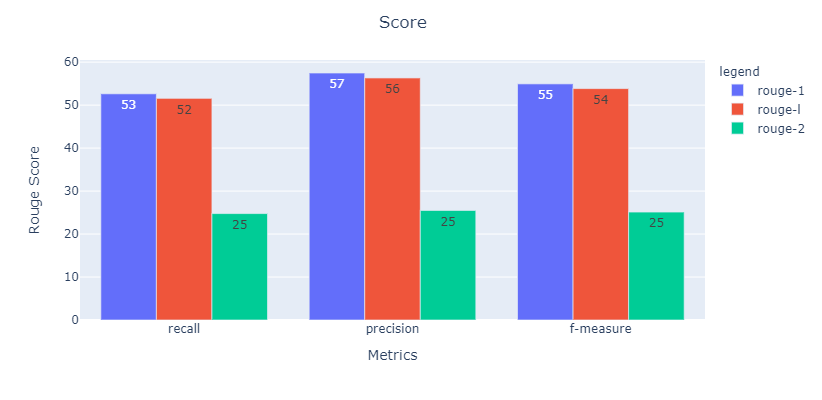

In [14]:
BARTRouge = BARTRouge[['rouge-1','rouge-l', 'rouge-2']]

fig = px.bar(BARTRouge*100, x=BARTRouge.index, y=BARTRouge.columns,
             barmode='group',
             text_auto='.2s',
             labels={
                     "Algo": "Algorithms",
                     "value": "Rouge Score",
                     "variable": "legend",
                     'index': "Metrics"
                 })
fig.update_layout( width=650,
                  height=400,
                title={
                  'text': "Score",
                  'y':.96,
                  'x':0.49,
                  'xanchor': 'center',
                  'yanchor': 'top'})

fig.show()


In [5]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.6 MB/s eta 0:00:00


In [7]:
from evaluate import load
# Load BLEU
bleu_metric = load("bleu")

In [8]:
# Calculate Bilingual Evaluation Understudy (BLEU)
results_bleu = bleu_metric.compute(predictions=Summaries['BARTSummary'], references=Summaries['Summary'])

In [9]:
print(results_bleu)

{'bleu': 0.1336066281732234, 'precisions': [0.40400031591833513, 0.1927003461420497, 0.10295836152284889, 0.059781236853176274], 'brevity_penalty': 0.9030365411439429, 'length_ratio': 0.9074473898748466, 'translation_length': 101292, 'reference_length': 111623}


In [13]:
# Create a DataFrame from the results_bleu dictionary
df = pd.DataFrame({
    'Metric': ['BLEU Score', '1-gram Precision', '2-gram Precision', '3-gram Precision', '4-gram Precision',
               'Brevity Penalty', 'Length Ratio', 'Translation Length', 'Reference Length'],
    'Value': [results_bleu['bleu']] + results_bleu['precisions'] +
             [results_bleu['brevity_penalty'], results_bleu['length_ratio'],
              results_bleu['translation_length'], results_bleu['reference_length']]
})

# Display the DataFrame
#df.set_index('Metric', inplace=True)
df

,Metric,Value
0,BLEU Score,0.133607
1,1-gram Precision,0.404000
2,2-gram Precision,0.192700
3,3-gram Precision,0.102958
4,4-gram Precision,0.059781
5,Brevity Penalty,0.903037
6,Length Ratio,0.907447
7,Translation Length,101292.000000
8,Reference Length,111623.000000


In [15]:
# Define a function for inference on a single news article
def generate_summary(news_text, model, tokenizer, max_length=512, num_beams=4, length_penalty=2.0):
    # Tokenize the input news text
    inputs = tokenizer.encode("summarize: " + news_text, return_tensors="pt", max_length=max_length, truncation=True)

    # Generate the summary
    summary_ids = model.generate(inputs.to(model.device), max_length=max_length, num_beams=num_beams, length_penalty=length_penalty, early_stopping=True)

    # Decode the summary IDs to text
    summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    
    return summary_text

# Example news article
news_article = data['Text_Cleaned'][0]


# Generate summary for the news article
summary = generate_summary(news_article, model, tokenizer)

print("news article")
print(news_article)
print()

print("reference summary")
print(data['Summary_Cleaned'][0])
print()
# Print the generated summary
print("Generated Summary:")
print(summary)



news article
अमेरिका की प्रथम महिला मिशेल ओबामा के जन्मदिन पर उनके पति राष्ट्रपति बराक ओबामा ने व्हाइट हाउस के करीब ही एक भोजनालय में शानदार दावत का आयोजन किया मिशेल ओबामा 48 वर्ष की हो गयी हैं अमेरिका के प्रथम दंपति अपने करीबी दोस्तों के साथ कड़ी सुरक्षा के बीच राष्ट्रपति भवन के करीब स्थित भोजनालय बीएलटी स्टीक में जमा हुए पहले भी विभिन्न भोजनालयों में यह जोड़ा जन्मदिन का जश्न मना चुका है बर्थडे गर्ल मिशेल के साथ ओबामा उनकी उम्र को लेकर लगातार हंसी-मजाक करते रहे हैं राष्ट्रपति ने चुटकी ली जब हमारी शादी हुयी तभी इस पर थोड़ा विवाद सा था क्योंकि वह मुझसे 20 वर्ष छोटी थीं लेकिन अब लगता है ठीक-ठाक है फ्रांसीसी शेफ और उद्यमी लौरेंट टूरोंडल द्वारा स्थापित यह रेस्टोरेंट बीएलटी प्रथम महिला को काफी भाता है क्योंकि वह पहले भी यहां आ चुकी हैं यह नहीं बताया गया कि इस युगल ने क्या-क्या आर्डर दिया पिछले सप्ताह उन्होंने अपना ट्विटर अकाउंट खोला था और सोमवार की शाम को नृत्य कौशल का भी प्रदर्शन किया था 

reference summary
मिशेल के जन्मदिन पर ओबामा ने दी शानदार दावत

Generated Summary:
मिशेल ओबामा के जन्म